In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
%matplotlib inline
%config IPCompleter.use_jedi = False

### Classification on Wine Dataset using Decision Tree Classifier.

In [5]:
from sklearn.datasets import load_wine
dataset = load_wine()
X = dataset["data"] 
y = dataset["target"]
feature_names = dataset["feature_names"]


In [6]:
# How many records are available?
X.shape[0], y.shape


(178, (178,))

In [7]:
# Are there missing values?
np.sum([X.flatten() == np.nan])

0

In [8]:
# How many elements does each class contain?
np.unique(y, return_counts = True)

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report
from sklearn.tree import plot_tree, export_graphviz

In [11]:
test_size = 0.25

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

### Decision Tree's internal structure

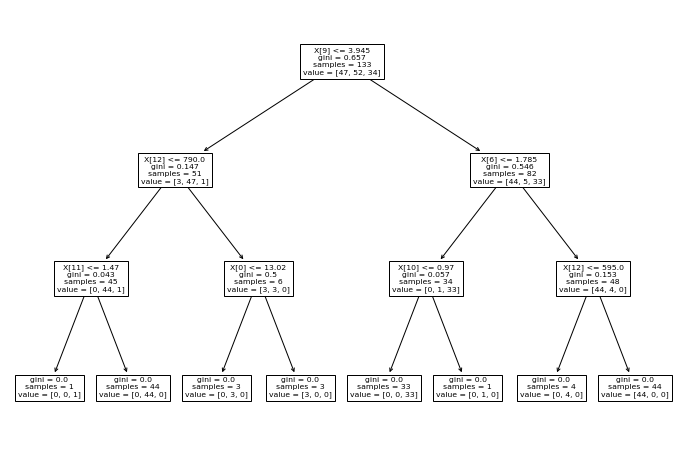

In [13]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize = (12,8))
plot_tree(clf, ax=ax);

In [14]:
export_graphviz(clf)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[9] <= 3.945\\ngini = 0.657\\nsamples = 133\\nvalue = [47, 52, 34]"] ;\n1 [label="X[12] <= 790.0\\ngini = 0.147\\nsamples = 51\\nvalue = [3, 47, 1]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[11] <= 1.47\\ngini = 0.043\\nsamples = 45\\nvalue = [0, 44, 1]"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 44\\nvalue = [0, 44, 0]"] ;\n2 -> 4 ;\n5 [label="X[0] <= 13.02\\ngini = 0.5\\nsamples = 6\\nvalue = [3, 3, 0]"] ;\n1 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3, 0]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0, 0]"] ;\n5 -> 7 ;\n8 [label="X[6] <= 1.785\\ngini = 0.546\\nsamples = 82\\nvalue = [44, 5, 33]"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="X[10] <= 0.97\\ngini = 0.057\\nsamples = 34\\nvalue = [0, 1, 33]"] ;\n8 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 33\\nval

In [15]:
y_pred_test = clf.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9111111111111111

In [16]:
p, r, f, s = precision_recall_fscore_support(y_test, y_pred_test)

__Precison, Recall, F-score and Support of Each Class label__

In [17]:
[p, r, f, s]

[array([0.84615385, 0.94117647, 0.93333333]),
 array([0.91666667, 0.84210526, 1.        ]),
 array([0.88      , 0.88888889, 0.96551724]),
 array([12, 19, 14], dtype=int64)]

In [18]:
rep = classification_report(y_test, y_pred_test)
print(rep)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.94      0.84      0.89        19
           2       0.93      1.00      0.97        14

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.91      0.91      0.91        45



In [19]:
from sklearn.model_selection import ParameterGrid
params = {
    "max_depth": [None, 4, 8],
    "splitter": ["best", "random"],
    "criterion": ["gini", "entropy"]    
}
sep = "_"*60
for config in ParameterGrid(params):
    print(config, end = f"\n{sep}\n")
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    rep = classification_report(y_test, y_pred_test)
    print(rep)

{'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}
____________________________________________________________
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.84      0.91        19
           2       0.93      1.00      0.97        14

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.93        45
weighted avg       0.94      0.93      0.93        45

{'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}
____________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.95      0.90        19
           2       0.92      0.79      0.85        14

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.92        45
weighted avg       0.91      0.91      0.91    

__Using K-folds for Cross Validation__

In [20]:
from sklearn.model_selection import KFold

In [21]:
kfold = KFold(shuffle= True)
f_score = []
for train_ind, test_ind in kfold.split(X, y):
    X_train = X[train_ind] 
    y_train = y[train_ind]
    X_test = X[test_ind]
    y_test = y[test_ind]
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    rep = classification_report(y_test, y_pred_test)
    p,r,f,s = precision_recall_fscore_support(y_test, y_pred_test)
    f_score.append(f)

In [22]:
f_mean_score = np.array(f_score).mean(axis = 1)
f_mean = f_mean_score.mean()
unc = f_mean_score.std()*2

print(f"Model has a f-score with mean {f_mean:.2f} +/- {unc:.2f}")

Model has a f-score with mean 0.92 +/- 0.13


__The f-Macro has decreased from 0.96 to 0.92__

We can further use Cross valditation Score and Cross Validation Predict methods to analyze the Over|Underfitting of Model.

In [23]:
from sklearn.model_selection import cross_val_score

__F-micro Average of each class, Model uses 5 K-folds as default Value.__

In [24]:
cross_val_score(clf, X, y, scoring="f1_micro")

array([0.94444444, 0.80555556, 0.94444444, 0.91428571, 0.85714286])

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
y_pred = cross_val_predict(clf, X, y)
accuracy_score(y, y_pred)

0.8820224719101124

In [27]:
p,r,f,s = precision_recall_fscore_support(y, y_pred)
f

array([0.88888889, 0.87769784, 0.87912088])

In [28]:
X[0].__len__()

13

### Classification on 2d-synthetic Dataset.

In [29]:
ds = np.loadtxt("2d-synthetic.csv", skiprows=1, delimiter= ",")
ds.shape

(500, 3)

In [30]:
df = pd.DataFrame(ds)
df

,0,1,2
0,9.833469,0.319565,0.0
1,1.801045,8.705072,0.0
2,4.423918,3.488906,1.0
3,0.280730,2.689037,1.0
4,5.999494,9.167512,0.0
...,...,...,...
495,4.995458,8.437083,0.0
496,6.636632,9.931535,0.0
497,6.373259,8.098388,0.0
498,1.230331,7.169844,1.0


In [31]:
df.isna().sum(axis = 0)

0    0
1    0
2    0
dtype: int64

In [32]:
df.columns = ["x", "y", "c"]

In [33]:
import seaborn as sns

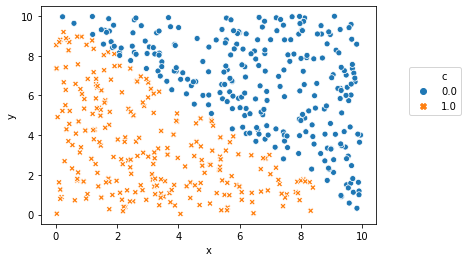

In [34]:
sns.scatterplot(data = df, x = "x", y = "y", hue = "c", style= "c")
plt.legend(loc= (1.1,.5));

__Attributes are distributed with a negative slope__
Decision Tree makes decisions one feature at a time, which means it splits the data paralel to x-axis.
For this problem the conventional split will take much longer to create the Model.

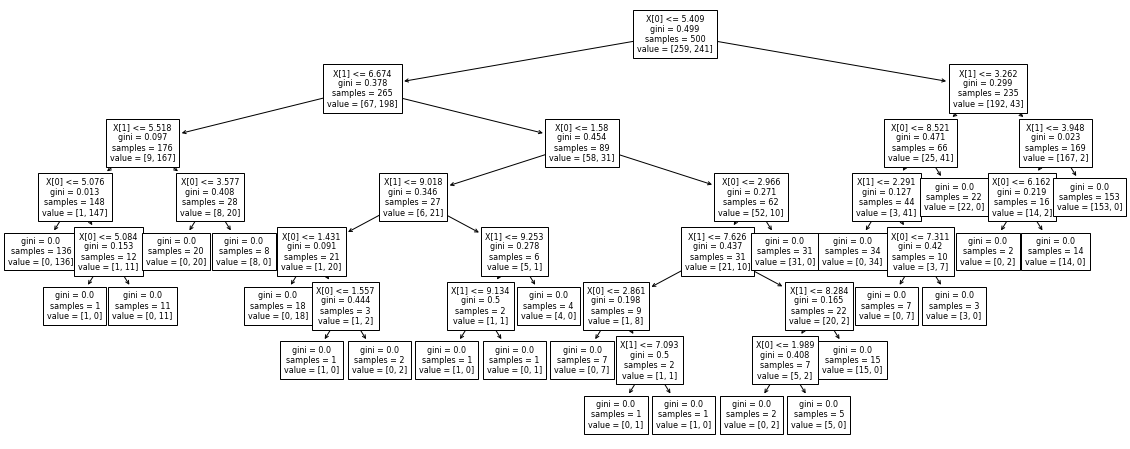

In [35]:
clf = DecisionTreeClassifier()
clf.fit(ds[:,:-1], ds[:,-1])
fig, ax = plt.subplots(figsize = (20,8))
plot_tree(clf, ax=ax, fontsize=8);

__With Some Feature engineering we can overcome this limitation of Decision Tree Classifiers__  
let's define a new dataset with only one feature as the sum of two feature of original Dataset.

In [36]:
# we merge two features into one
X_ = ds[:,0] + ds[:,1]
X_ = X_.reshape(len(X_),1)

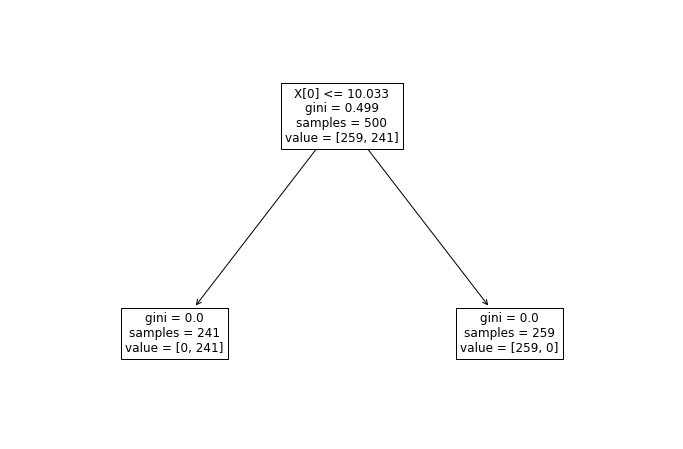

In [37]:
clf = DecisionTreeClassifier()
clf.fit(X_, ds[:,-1])
fig, ax = plt.subplots(figsize = (12,8))
plot_tree(clf, ax=ax, fontsize=12);

__As we can see, the model is simple and fast w.r.t the previous one.__

In [38]:
clf.tree_.feature

array([ 0, -2, -2], dtype=int64)

In [39]:
clf.tree_.threshold

array([10.03269005, -2.        , -2.        ])

### Classification using Random Forest on MNIST Dataset

In [40]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")
X = dataset["data"] 
y = dataset["target"]

In [41]:
test_size = 1/7

__First, we will create our own version of Random Forest using "trees" of DecisionTree provided by scikit library__

In [42]:
from scipy.stats import mode
class MyRandomForestClassifier():
    def __init__(self, n_estimators = 10, max_features = "sqrt"):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.trees = []
        self.results = []
        
        # train the trees of this random forest using subsets of X (and y)
    def fit(self, X, y):
        N = X.shape[0]
        for _ in range(self.n_estimators):
            subset_ind = np.random.choice(N, N, replace=True)
            self.trees.append( \
                DecisionTreeClassifier( \
                     max_features= self.max_features) \
                .fit(X[subset_ind], y[subset_ind]))
        pass
        # predict the label for each point in X
    def predict(self, X):
        self.results = [tree.predict(X) for tree in self.trees]
        return mode(self.results, axis=0)[0][0]

In [43]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=1/7, shuffle=True, stratify=y)

In [44]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with single default Decision Tree clf: {acc:.5f}")

Accuracy with single default Decision Tree clf: 0.87820


__Let's change the hyper parameters of this classifier__

In [45]:
rf = MyRandomForestClassifier(10,28)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with Random Forest: {acc:.5f}")

Accuracy with Random Forest: 0.94770


__Using 10 trees and 28 features at a time, the accuracy has increased almost 7%__  
Let's take one step further and check if adding more trees to our "forest" will improve the accuracy of this model.

In [46]:
for n in np.arange(10,101,10):
    rf = MyRandomForestClassifier(n,28)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with Random Forest of {n} trees: {acc:.5f}")

Accuracy with Random Forest of 10 trees: 0.94850
Accuracy with Random Forest of 20 trees: 0.96280
Accuracy with Random Forest of 30 trees: 0.96410
Accuracy with Random Forest of 40 trees: 0.96610
Accuracy with Random Forest of 50 trees: 0.96660
Accuracy with Random Forest of 60 trees: 0.96890
Accuracy with Random Forest of 70 trees: 0.96930
Accuracy with Random Forest of 80 trees: 0.97000
Accuracy with Random Forest of 90 trees: 0.97070
Accuracy with Random Forest of 100 trees: 0.97130


__Now we can use Random Forest Classifier provided by scikit library and check its accuracy__

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
for n in np.arange(10,101,10):
    rf = RandomForestClassifier(n_estimators= n)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with Random Forest of {n} trees: {acc:.5f}")

Accuracy with Random Forest of 10 trees: 0.94830
Accuracy with Random Forest of 20 trees: 0.96030
Accuracy with Random Forest of 30 trees: 0.96440
Accuracy with Random Forest of 40 trees: 0.96490
Accuracy with Random Forest of 50 trees: 0.96890
Accuracy with Random Forest of 60 trees: 0.97070
Accuracy with Random Forest of 70 trees: 0.96950
Accuracy with Random Forest of 80 trees: 0.96980
Accuracy with Random Forest of 90 trees: 0.97010
Accuracy with Random Forest of 100 trees: 0.96980


__Comparing different time complexities to train the model of :__  
- Decision Tree Classifier (Scikit)
- Random Forest (Our version)
- Random Forest (Scikit)

In [49]:
from timeit import timeit

clf_tree = DecisionTreeClassifier()
print("Decision tree", timeit(lambda: clf_tree.fit(X_train, y_train),\
                              number=1))
clf_my_rf = MyRandomForestClassifier()
print("My Random forest", timeit(lambda: clf_my_rf.fit(X_train, y_train),\
                              number=1))
clf_rf = RandomForestClassifier(10)
print("Random forest", timeit(lambda: clf_rf.fit(X_train, y_train),\
                              number=1))

Decision tree 38.50822729999982
My Random forest 19.132232699999804
Random forest 8.73604130000058


__Scikit provides the list of features with their importance.__  
We can exploit this list to see which parts of the image plays the key role in classifying it's label.


In [50]:
len(clf_rf.feature_importances_)

784

In [51]:
clf_rf.feature_importances_.argmax()

322

__Importance matrix for Random Forest Model__

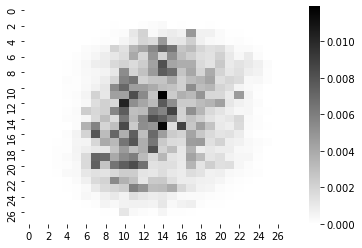

In [52]:
sns.heatmap(data = clf_rf.feature_importances_.reshape((28,28)), cmap=  'binary');

__Compare this to the Decision Tree Model. We have much less details.__  
This means that the importance is not well spread and mainly a small feature set is defining the class label.

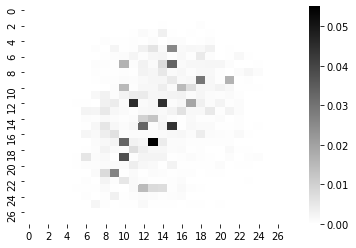

In [53]:
sns.heatmap(data = clf_tree.feature_importances_.reshape((28,28)), cmap=  'binary');